In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


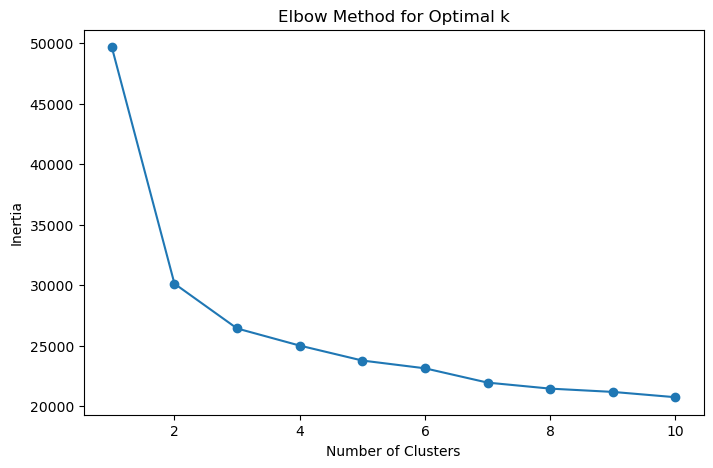

          count       mean       std   min   25%   50%   75%   max
cluster                                                           
0        8664.0  91.183172  2.640058  87.0  89.0  91.0  93.0  97.5
1        7545.0  73.427170  2.579906  67.5  71.5  73.5  75.5  77.5
2        8130.0  82.184748  2.595086  78.0  80.0  82.0  84.5  86.5
3        2101.0  80.211328  4.362676  73.0  76.5  80.0  84.0  87.5

Cluster 0 - Most Common Skills:


NameError: name 'Counter' is not defined

In [3]:


# Load the CSV file
df = pd.read_csv('CLEANED_data_job_descriptions.csv')

# Fill NaN values in the 'skills' column with empty strings
df['skills'] = df['skills'].fillna('')

# Convert skills into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
skills_tfidf = tfidf.fit_transform(df['skills'])
skills_tfidf_df = pd.DataFrame(skills_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Standardize the 'mean_salary' column
scaler = StandardScaler()
df['mean_salary_scaled'] = scaler.fit_transform(df[['mean_salary']])

# Combine TF-IDF features with scaled mean_salary
cluster_data = pd.concat([skills_tfidf_df, df['mean_salary_scaled']], axis=1)

# Determine the optimal number of clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform K-Means clustering
k = 4  # Replace with the optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_data)

# Group by cluster and analyze mean_salary
cluster_summary = df.groupby('cluster')['mean_salary'].describe()
print(cluster_summary)

# Get the most common skills in each cluster
for cluster in range(k):
    print(f"\nCluster {cluster} - Most Common Skills:")
    cluster_skills = ' '.join(df[df['cluster'] == cluster]['skills'])
    common_skills = Counter(cluster_skills.split()).most_common(10)
    print(common_skills)

# Reduce TF-IDF features to 2D using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(skills_tfidf_df)
df['pca_1'] = reduced_features[:, 0]
df['pca_2'] = reduced_features[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()